# Data Workshop 1

**Instructor:** Tommy Stone, Applied Ocean Science (AOS) PhD student (thstone@ucsd.edu)
**TAs:** Austin Green (a7green@ucsd.edu)

This notebook is meant to be a general guide into data analysis with Python. This is meant to show a typical data analysis workflow for graduate students looking at a new dataset. We will apply concepts learned in this math workshop and demonstrate how they translate into everyday research. The topics include

1) Loading a new dataset
2) Determining the statistics and gradients
3) Visualizing the statistics as well as the variables

Author: Tommy Stone

Notes adapted from **Andrea Rodriguez-Marin Freudmann notebook from Data 1 2024** 

Dataset created by **Caeli Griffin, Kaley Mudd and Turner Johnson**

## 1 | Importing Libraries and Loading a NetCDF File


### 1.1 Importing Libraries

What some individuals like (and don't like) about python is it's library system. Below are some standard libraries that are used within oceanography and that we will use in this notebook

**Description of Libraries**

- **NumPy**: A fundamental package for scientific computing and linear algebra in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

- **xarray**: A library designed for working with labeled multi-dimensional arrays. It is particularly useful for handling datasets with dimensions like time, latitude, and longitude, often used in geosciences and often used for opening NetCDF (.net) 

- **matplotlib**: A comprehensive library for creating static, animated, and interactive visualizations in Python. It is widely used for plotting graphs and charts.

- **gsw**: The Gibbs SeaWater (GSW) Oceanographic Toolbox for Python. It is used for oceanographic calculations, such as determining seawater properties like salinity and density.

- **datetime**: A module in Python's standard library for working with dates and times. It provides classes for manipulating dates, times, and intervals.
  
- **cmocean**: A library of uniform colormaps designed specifically for oceanographic data. It provides colormaps that are visually appealing and scientifically accurate for representing data such as temperature, salinity, and density.

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean.cm as cm
import gsw

# converting ordinal to dattime
import datetime


### 1.2 Loading the data

We will be analyzing data collected from the Washington Shelf. File is located on our shared Google Drive, download the file in the same directory as this notebook and execute the following commands

[Download the dataset from Google Drive](https://drive.google.com/file/d/1LaD2vD9eag6EhWqv2sMMbanr_Ed6v9JM/view?usp=drive_link)

Xarray can be used to open the data 

```
xr.open_dataset('washington_sehfl_data.nc)
```

In [6]:
# load the dataset
data = xr.open_dataset("washington_shelf_data.nc")

# review the outputs
data

<xarray.Dataset> Size: 49kB
Dimensions:  (time: 19, depth: 105)
Coordinates:
  * time     (time) datetime64[ns] 152B 1900-01-09T13:04:54 ... 1900-01-09T13...
  * depth    (depth) float64 840B -3.0 -3.5 -4.0 -4.5 ... -54.0 -54.5 -55.0
Data variables:
    rho      (time, depth) float64 16kB ...
    sal      (time, depth) float64 16kB ...
    temp     (time, depth) float64 16kB ...
Attributes: (12/14)
    title:          OOI Washington Shelf Surface-Piercing Profiler CTD
    source:         CE02SHSP-SP001-08-CTDPFJ000-recovered_cspp-ctdpf_j_cspp_i...
    creation_date:  2024-09-09 19:32:12
    sourceUrl:      http://oceanobservatories.org/
    institution:    Ocean Observatories Initiative
    Manufacturer:   Sea-Bird Electronics
    ...             ...
    Description:    CTD Profiler: CTDPF Series J
    latitude:       44.6350
    longitude:      -124.3059
    Owner:          Oregon State University
    gridded by:     Turner Johnson
    for use in:     SIO Math Workshop 2024

## 2. | Statistics of the data

### 2.1 | Looking at the whole dataset

Pick a variable that interests from our options of density, salinity and temperature. In python we use the plt (plot) command from Matplotlib. To plot 2D colormaps we could use pcolormesh. Below are some options for python

- **plt.pcolormesh(x,y,data)**: creates a 2D colormap of data
- **plt.plot(x,y)**: Creates a 2D plot of y vs x. Can also use a c option to include color

---

**Exercise**

---


1) Plot a 2D colormap of time vs depth over our variable of interests. Below is an example of a 2D plot over density.

2) Play with other variables and use other colormaps from [cmocean](https://matplotlib.org/cmocean/)

```
cb0 = plt.pcolormesh(data['time'], data['depth'], data['rho'].T, cmap = cm.dense);
plt.colorbar(cb0, label = "Density (kg/m^3)");
plt.xlabel("Time");
plt.ylabel("Depth (m)");
plt.xticks(rotation = 45);
```

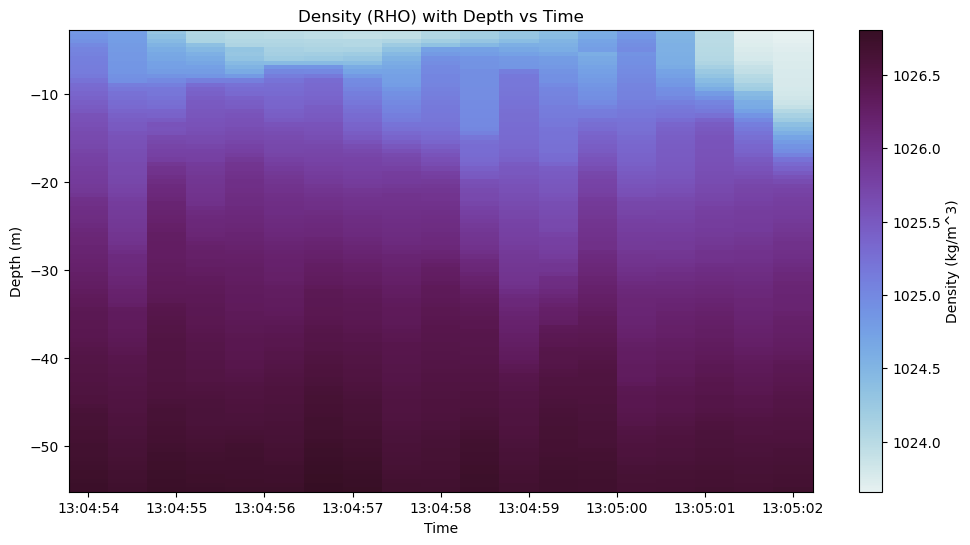

In [ ]:
# grab dimensions
M,N = data['rho'].shape

# Separating variables for easier access. Capital means a matrix and lower case means a vector
SAL = data['sal'].to_numpy()
TEMP = data['temp'].to_numpy()
depth = data['depth'].to_numpy()
time = data['time'].to_numpy()
RHO = data['rho'].to_numpy()

# Create a pcolormap of density with depth vs time
fig, ax = plt.subplots(figsize=(12, 6))
c = ax.pcolormesh(time, depth, RHO.T, shading='auto', cmap=cm.dense)
ax.set_title('Density (RHO) with Depth vs Time')
ax.set_xlabel('Time')
ax.set_ylabel('Depth (m)')
fig.colorbar(c, ax=ax, label='Density (kg/m^3)')
plt.show()



### 2.2 | Separating into meaningful chunks

Compare variables which were measured at both the top and bottom of the water column (salinity, temperature, density).
 
Now look at the statistics over periods of time (hours, days)

What conclusions can you draw from the differences/similarities between the statistics of your variable when looking at different sets of time/depth? 


<u> Useful commands:
```
data['variable'].mean
```

Maximum density: 1026.8088984693732
Minimum density: 1023.6581371622559


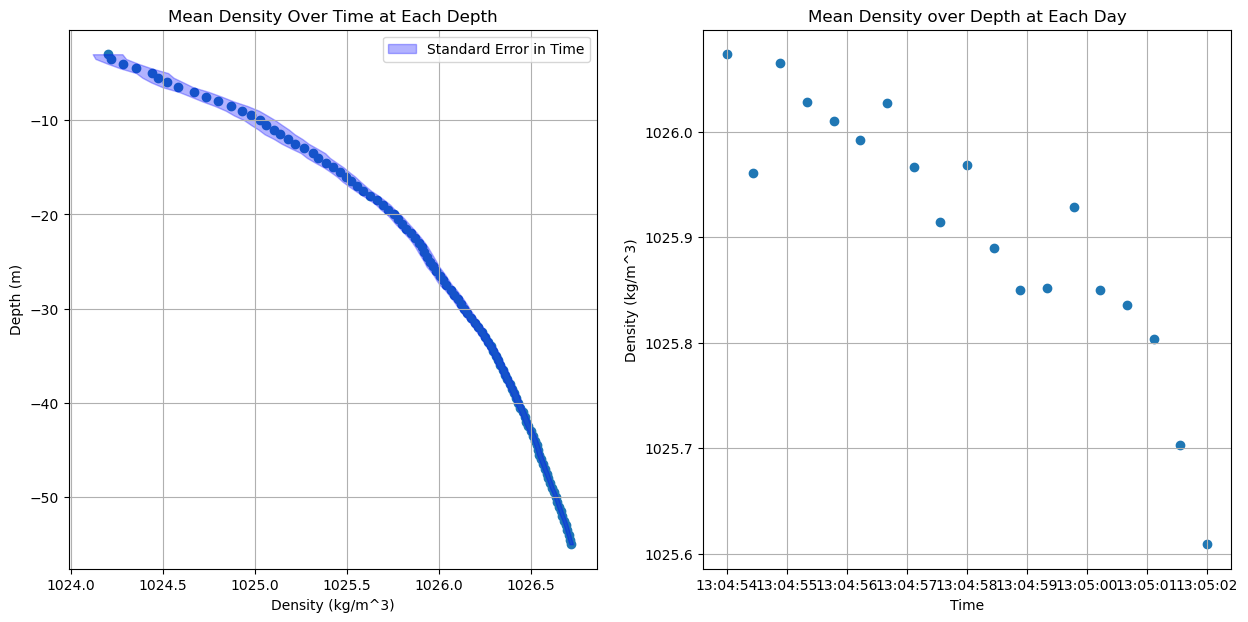

In [11]:
# There are a few ways to do this. It depends on what you are interested in. If you want to know the mean and standard deviation
# of your variable across all of time at various depths
mean_depth = RHO.mean(axis = 0)
std_depth = RHO.std(axis = 0)
max_rho = RHO.max()
min_rho = RHO.min()

mean_time = RHO.mean(axis = 1)
std_time = RHO.std(axis = 1)

# Compute the standard error for RHO
std_error_depth = std_depth / np.sqrt(M)
std_error_time = std_time / np.sqrt(N)

# plot the mean at each depth
fig, axs = plt.subplots(1,2, figsize = (15,7))
axs[0].scatter(mean_depth, data['depth'])
axs[0].fill_betweenx(data['depth'], mean_depth - std_error_depth, mean_depth + std_error_depth, alpha=0.3, color='blue', label='Standard Error in Time')
axs[0].legend()
axs[0].grid()
axs[0].set_title("Mean Density Over Time at Each Depth")
axs[0].set_xlabel("Density (kg/m^3)")
axs[0].set_ylabel("Depth (m)")

axs[1].scatter(data['time'], mean_time)
axs[1].grid()
axs[1].set_title("Mean Density over Depth at Each Day")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Density (kg/m^3)")

print("Maximum density: {}".format(max_rho))
print("Minimum density: {}".format(min_rho))

